# POSTTEST6 - Unsupervised Machine Learning

><p> Nama : Tito Darmawan <br> NIM : 2109106042 <br> Dataset : </p>

[Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

## Import dan Info Dataset

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv(
    "books.csv", 
    on_bad_lines="skip"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## Pelabelan Dataset
> <b> Dataset dilabeli dengan keterangan yang isinya gabungan 2 ketentuan :
  <br> 1. Ketebalan buku berdasarkan jumlah lembar yang ada dimana 0 - 2000 "tipis", 2001 - 4000 "tebal", dan 4001 keatas sebagai "sangat tebal".
  <br> 2. Keterangan Rekomendasi buku berdasarkan rata-rata rating yang ada dimana 0.00 - 2.99 "Kurang", 3.00 - 3.99 "Lumayan", dan 4.00 - 5.00 "Direkomendasikan".
  <b>
### Ketebalan

In [13]:
df.loc[
    (df['  num_pages'] >= 0)& 
    (df['  num_pages'] <= 2000), 
    'ketebalan'
] = "Tipis"

df.loc[
    (df['  num_pages'] > 2000)& 
    (df['  num_pages'] <= 4000), 
    'ketebalan'
] = "Tebal"

df.loc[
    (df['  num_pages'] > 4000), 
    'ketebalan'
] = "Sangat Tebal"

print("Pengecekan Penambahan Label 1 :")
df[["  num_pages", "ketebalan"]].head()

Pengecekan Penambahan Label 1 :


,num_pages,ketebalan
0,652,Tipis
1,870,Tipis
2,352,Tipis
3,435,Tipis
4,2690,Tebal


### Rekomendasi

In [14]:
df.loc[
    (df['average_rating'] >= 0.00)& 
    (df['average_rating'] <= 2.99), 
    'rekomendasi'
] = "Kurang"

df.loc[
    (df['average_rating'] >= 3.00)& 
    (df['average_rating'] <= 3.99), 
    'rekomendasi'
] = "Lumayan"

df.loc[
    (df['average_rating'] >= 4.00)& 
    (df['average_rating'] <= 5.00), 
    'rekomendasi'
] = "Direkomendasikan"

print("Pengecekan Penambahan Label 2 :")
df[["average_rating", "rekomendasi"]].tail()

Pengecekan Penambahan Label 2 :


,average_rating,rekomendasi
11118,4.06,Direkomendasikan
11119,4.08,Direkomendasikan
11120,3.96,Lumayan
11121,3.72,Lumayan
11122,3.91,Lumayan


In [15]:
df["keterangan"] = df[["ketebalan", "rekomendasi"]].apply(" ".join, axis=1)
df.drop('ketebalan', inplace=True, axis=1)
df.drop('rekomendasi', inplace=True, axis=1)

In [33]:
print("Label keterangan buku : ")
df[["average_rating", "  num_pages", "keterangan"]].head()

Label keterangan buku : 


,average_rating,num_pages,keterangan
0,4.57,652,Tipis Direkomendasikan
1,4.49,870,Tipis Direkomendasikan
2,4.42,352,Tipis Direkomendasikan
3,4.56,435,Tipis Direkomendasikan
4,4.78,2690,Tebal Direkomendasikan


In [38]:
df['keterangan'].unique()

array(['Tipis Direkomendasikan', 'Tebal Direkomendasikan',
       'Tipis Lumayan', 'Tipis Kurang', 'Sangat Tebal Direkomendasikan'],
      dtype=object)

## Data Scaling dan Pembuatan Subset

In [39]:
from sklearn.preprocessing import StandardScaler

df_s = df[["average_rating", "  num_pages"]]
ss = StandardScaler()
x_s = ss.fit_transform(df_s)
x_s

array([[ 1.8144933 ,  1.30875055],
       [ 1.58622811,  2.212783  ],
       [ 1.38649606,  0.06466919],
       ...,
       [ 0.07397122,  0.32592627],
       [-0.61082435,  0.40471809],
       [-0.06869452, -0.26708584]])

# K-Means

In [40]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters = 5, random_state = 0)
model_km.fit(x_s)

labels = model_km.labels_
print(labels)

[2 0 4 ... 2 1 4]


## Visualisasi Hasil Model K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

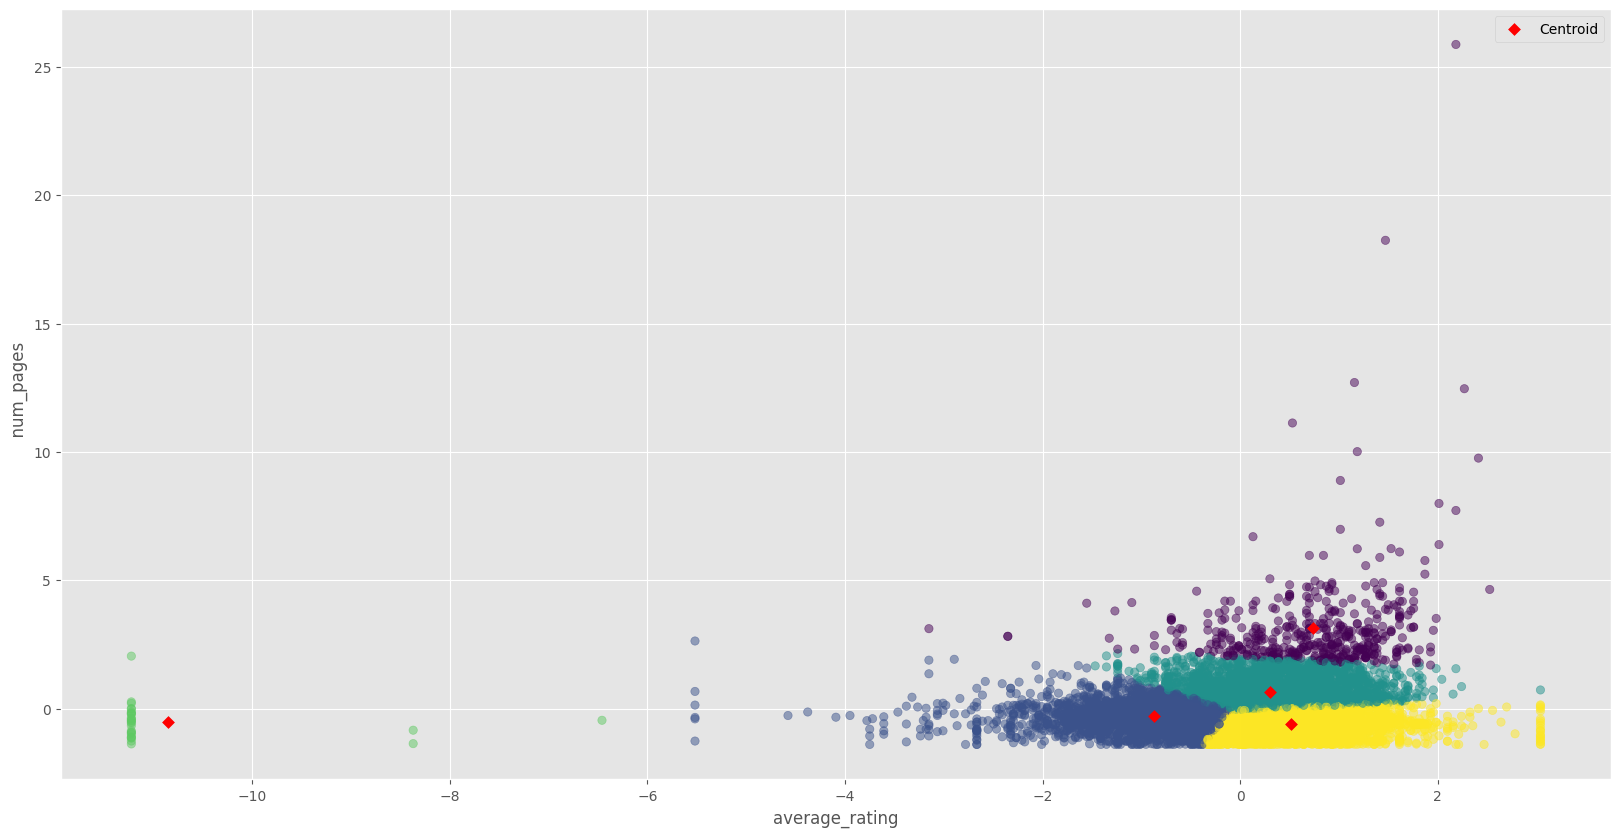

In [49]:
xs = x_s[:, 0]
ys = x_s[:, 1]

ctd = model_km.cluster_centers_
ctd_x = ctd[:, 0]
ctd_y = ctd[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(ctd_x, ctd_y, c = 'red', marker = 'D', label = 'Centroid')
plt.xlabel('average_rating')
plt.ylabel('  num_pages')
plt.legend()
plt.show

# Aglomerative Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering

hc_c = AgglomerativeClustering(n_clusters = 5)
agc = hc_c.fit_predict(x_s)

print(agc)   

[4 4 0 ... 1 1 0]


## Visualisasi Hasil Model Aglomerative

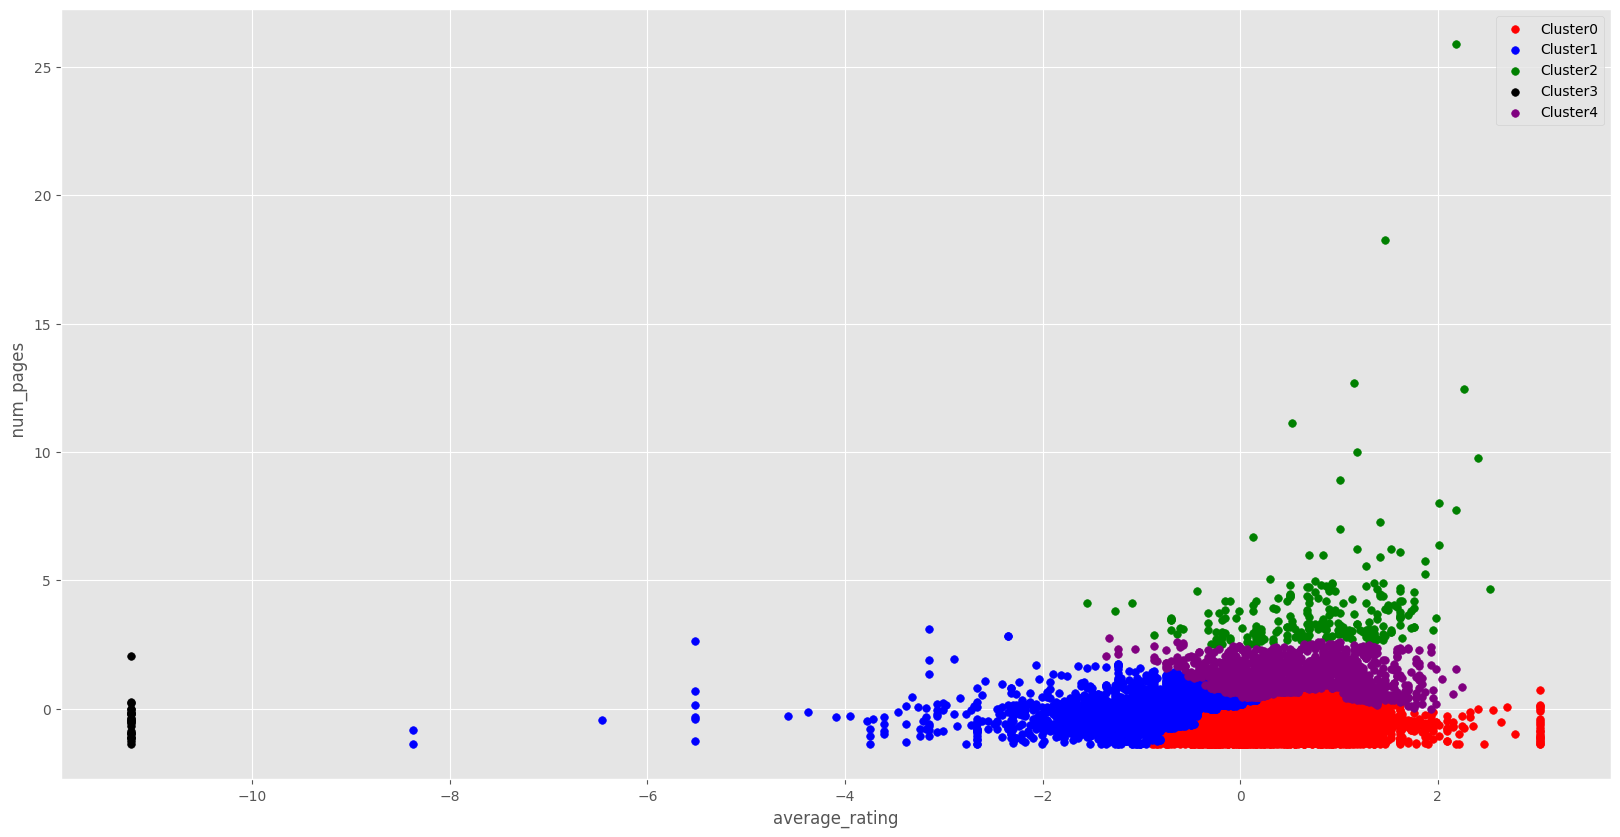

In [61]:
plt.figure(figsize=(20,10))

plt.scatter(
    x_s[agc == 0,0], 
    x_s[agc == 0,1],
    s = 30,
    c = 'red',
    label = 'Cluster0'
)
plt.scatter(
    x_s[agc == 1 ,0], 
    x_s[agc == 1 ,1],
    s = 30,
    c = 'blue',
    label = 'Cluster1'
)
plt.scatter(
    x_s[agc == 2 ,0], 
    x_s[agc == 2 ,1],
    s = 30,
    c = 'green',
    label = 'Cluster2'
)
plt.scatter(
    x_s[agc == 3 ,0], 
    x_s[agc == 3 ,1],
    s = 30,
    c = 'black',
    label = 'Cluster3'
)
plt.scatter(
    x_s[agc == 4 ,0], 
    x_s[agc == 4 ,1],
    s = 30,
    c = 'purple',
    label = 'Cluster4'
)

plt.xlabel('average_rating')
plt.ylabel('  num_pages')
plt.legend()
plt.show()